# 1. Choosing Data Set
I choosed the titanic data set. This dataset include the sample of the passengers on the Titanic. The dataset contains Passengers' information such as age, gender, etc.

# 2. Questions
In this analysis where are going to answer questions below.

- Which social class made people more likely to survive?
- Which embarking port made people more likely to survive?

# 3. Import library
In order to analysis I need to import the numpy, pandas, matplotlib.pyplot python libraries.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 4. Reading CSV

In [2]:
titanic_dataset = pd.read_csv('titanic-data.csv')
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I read csv into Pandas Dataframe in titanic_dataset variable. Then I printed top 5 value and I saw data is correct.

# 5. Data Wrangling / Cleaning
Before I worked with the data I need to clean data and wrangle. Because non-uniform data can corrupt my analysis. I find missing data with titanic_dataset.info()

In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


I can see that the Age, Cabin and Embarked columns are missing entries. I will need to find a way update missing ages and embarked port. But cabin column has Too much missing data. Therefore I will remove that column.

# 5.1 Missing Age
In order to fill the missing ages I will use the mean age.

In [4]:
#find age_mean
age_mean = titanic_dataset['Age'].mean()

#fill age with age_mean
titanic_dataset['Age'].fillna(age_mean,inplace=True)

# 5.2 Missing embarked
In order to fill the missing embarked ports I will use maximum count embarked ports.

In [5]:
#Fill Embarked port
em_port = titanic_dataset.groupby(['Embarked'])['Embarked'].count().sort_values(ascending = False)
most_frequent_embark = em_port.index[0]
titanic_dataset['Embarked'].fillna(most_frequent_embark,inplace=True)

# 5.3 Removing Cabin
Cabin column has too much missing data. Therefore I want to remove that column. Additionally cabin are not required in this analysis. I can remove the cabin column with titanic_dataset.drop(['Cabin'],axis=1).

In [6]:
titanic_dataset = titanic_dataset.drop(['Cabin'], axis=1)
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


# 6. Analyze Data

## 6.1 General Analyze

In [7]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above table gives general data information about the data columns.

# 6.2 Which social class made people more likely to survive?
In order to answer this question I need to look at how many first, second and third social class people were on board and which social class has the highest survival rate. First we will look how many people survive in each social.

In [8]:
table = pd.crosstab(titanic_dataset['Survived'],titanic_dataset['Pclass'])
print (table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Second We will draw a graph based on the number of survivors in each class.



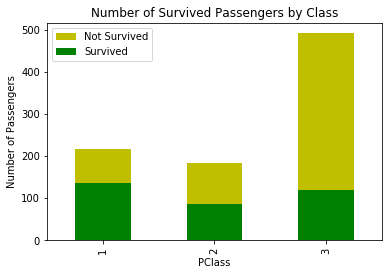

In [9]:
pbc_total = titanic_dataset.groupby("Pclass")["Survived"].count()
pbc_survived = titanic_dataset.groupby("Pclass")["Survived"].sum()

pbc_total.plot(kind="bar", color="y", label="Not Survived")
pbc_survived.plot(kind="bar", color="g", label="Survived")
plt.title('Number of Survived Passengers by Class')
plt.ylabel('Number of Passengers')
plt.xlabel('PClass')
plt.legend(loc=2)
plt.show()

Finally we will calculate the rate of survive in each class.

In [10]:
survived_mean = titanic_dataset.groupby('Pclass').Survived.mean()
print (survived_mean)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


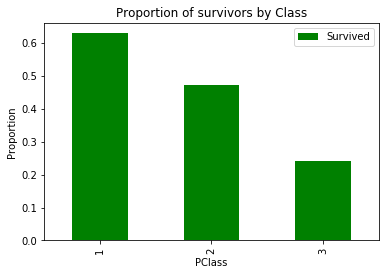

In [15]:
pbc_total = titanic_dataset.groupby('Pclass').Survived.mean()

pbc_total.plot(kind="bar", color="g")
plt.legend(loc=1)
plt.title('Proportion of survivors by Class')
plt.ylabel('Proportion')
plt.xlabel('PClass')
plt.show()

The following information can be accessed from the above graph and survived_mean.

62.96 percent of the first class passengers survived. 47.28 percent of the 2nd class passengers survived. 24.23 percent of the 3rd class passengers survived

The survival rate of a first class passenger is much higher than the survival rate of the second class passenger. The survival rate of a second class passenger is much higher than the survival rate of a third class passenger.

We calculate the correlation between survival and social class

In [17]:
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

Pclass = titanic_dataset['Pclass']
Survived = titanic_dataset['Survived']

print(correlation(Pclass, Survived))

-0.33848103596101325


The correlation check shows higher number of second class passengers survived as compared to the third class.
# 6.2 Which embarking port made people more likely to survive?
In order to answer this question I need to look at how many people survive in each port. First we will look how many people survive in each embarking port.

In [18]:
table = pd.crosstab(titanic_dataset['Survived'],titanic_dataset['Embarked'])
print (table)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


Second We will draw a graph based on the number of survivors in each embarking port.

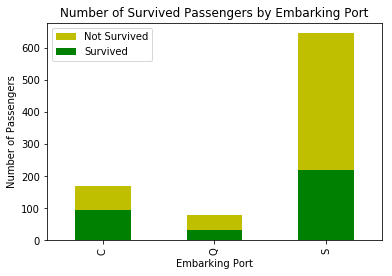

In [23]:
emb_total = titanic_dataset.groupby("Embarked")["Survived"].count()
emb_survived = titanic_dataset.groupby("Embarked")["Survived"].sum()

emb_total.plot(kind="bar", color="y", label="Not Survived")
emb_survived.plot(kind="bar", color="g", label="Survived")
plt.title('Number of Survived Passengers by Embarking Port')
plt.ylabel('Number of Passengers')
plt.xlabel('Embarking Port')
plt.legend(loc=2)
plt.show()

Finally we will calculate the rate of survive in each embarking port.

In [24]:
survived_mean = titanic_dataset.groupby('Embarked').Survived.mean()
print (survived_mean)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


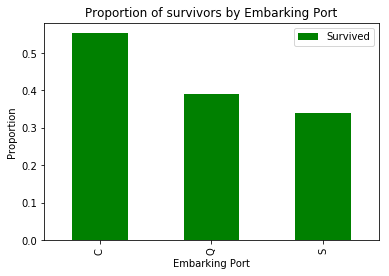

In [25]:
emb_total = titanic_dataset.groupby('Embarked').Survived.mean()

emb_total.plot(kind="bar", color="g")
plt.legend(loc=1)
plt.title('Proportion of survivors by Embarking Port')
plt.ylabel('Proportion')
plt.xlabel('Embarking Port')
plt.show()

The following information can be accessed from the above graph and survived_mean.

55.35 percent of the C Embarking Port passengers survived. 38.96 percent of the Q embarking port passengers survived. 33.90 percent of the S Embarking Port passengers survived

The survival rate of C Embarking Port passengers is much higher than the survival rate of the Q Embarking Port passengers passenger. The survival rate of the Q Embarking Port passengers passenger is much higher than the survival rate of S Embarking Port passengers passenger.

We calculate the correlation between survival and embarking port.

In [29]:
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

def map_data(df):
    port_map = {'S': 1,'Q':2, 'C': 3}
    df['Embarked'] = df['Embarked'].map(port_map)
    return df

titanic_dataset1 = map_data(titanic_dataset)

Embarked = titanic_dataset1['Embarked']
Survived = titanic_dataset['Survived']

print (correlation(Embarked, Survived))

nan


The correlation check shows higher number of C embarking port passengers survived as compared to the S embarking port passanger. But the corellation between embarking port and survival is not very strong.

# 7. Conclusion
I found limitations in this dataset such as missing data. Also There wasn't full data. There was only sample data. I make deeper analysis difficult. If I have the data of all passengers, I could do more accurate analysis. Missing data can change our analysis. Another thing, I don't know The sample data is whether biased or unbiased.

Another difficulty in the dataset was the empty data. In some empty areas we filled in with the average value or maximum value. I have studied the relationship between survival and embarking port. Data of Embarking Port is empty. I found maximum count embarked ports and We filled this field with the maximum number of values. This states can lead to fault in this analysis.

I did not choose to do analysis on age. Because Dataset has 157 missing ages. If I delete the rows with missing age, this could limit the accuracy of the analysis but the accuracy of the analysis of the Age factor would be more accurate. I filled this field with average of ages. However this case affects the accuracy of the analysis

The more information I have the better it can be analysed. For example how many lifeboats were on board and how many passengers can take these lifeboats. If I know this informtion, We could comment on how people died because they did not have boats on board. Another example The knowledge that dead people died by freezing or drowning.If I knew this information, I could analyze how many people died because of the water temperature.

Summary of the above data analysis:

The major findings of this analysis are the following:

62.96 percent of the 1st class passengers survived whereas, the survival percentage amongst the third class passengers was only a third of this.

Passengers travelling in first class tended to survive most while third class passengers survived the least, second even though third class passengers were present in biggest number (491).

55.35 percent of the C Embarking Port passengers survived whereas, 33.90 percent of the S Embarking Port passengers survived. There is about 22 percent difference.

C Embarking Port passengers better chance of survival. But the corellation between embarking port and survival is not very strong.

The corallation between Social class and survival is much higher than The corallation between Embarking Port and survival.